In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/Deep_learning/HW4/images/hw04_coco_data/Train


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


len= 100

[epoch:1, batch:  100] loss: 0.419

[epoch:2, batch:  100] loss: 0.385

[epoch:3, batch:  100] loss: 0.371

[epoch:4, batch:  100] loss: 0.360

[epoch:5, batch:  100] loss: 0.351

[epoch:6, batch:  100] loss: 0.342

[epoch:7, batch:  100] loss: 0.334

[epoch:8, batch:  100] loss: 0.326

[epoch:9, batch:  100] loss: 0.319

[epoch:10, batch:  100] loss: 0.311

[epoch:11, batch:  100] loss: 0.304

[epoch:12, batch:  100] loss: 0.297

[epoch:13, batch:  100] loss: 0.290

[epoch:14, batch:  100] loss: 0.283

[epoch:15, batch:  100] loss: 0.277

[epoch:16, batch:  100] loss: 0.270

[epoch:17, batch:  100] loss: 0.264

[epoch:18, batch:  100] loss: 0.257

[epoch:19, batch:  100] loss: 0.252

[epoch:20, batch:  100] loss: 0.244

[epoch:21, batch:  100] loss: 0.237

[epoch:22, batch:  100] loss: 0.231

[epoch:23, batch:  100] loss: 0.223

[epoch:24, batch:  100] loss: 0.216

[epoch:25, batch:  100] loss: 0.209

[epoch:26, batch:  100] loss: 0.203

[epoch:27, batch:  100] loss: 0.196



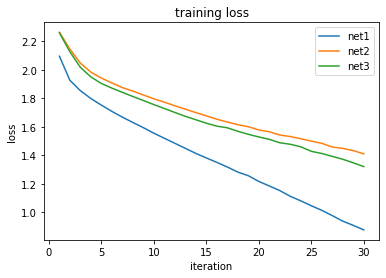

In [ ]:
my_imageroot='/content/drive/MyDrive/Deep_learning/HW4/images/hw04_coco_data/Train'
import re
output_root='/content/drive/MyDrive/Deep_learning/HW4/images/hw04_coco_data/Train'
output_root= re.sub('Train/', '', output_root)
print(output_root)
my_classlist=['airplane','boat','cat','dog','elephant','giraffe','horse','refrigerator','train','truck']
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets
from torchvision import transforms as tvt
from torch.utils.data import DataLoader
transform = tvt.Compose([ tvt.ToTensor () , tvt. Normalize((0.5,0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = datasets.ImageFolder(my_imageroot, transform=transform)
train_data_loader = DataLoader(dataset = train_dataset,batch_size =350,shuffle =True,num_workers=4)
print('len=',len(train_data_loader))
import torch
import random
import torch.nn as nn
import torch.nn.functional as F
dtype = torch.float64
device = torch.device ("cuda:0" if torch.cuda.is_available () 
                                  else "cpu")
seed = 0
random.seed(seed)
torch.manual_seed(seed)
epochs = 30 # feel free to adjust this parameter
os.chdir(my_imageroot)

class TemplateNet(torch.nn.Module):
      def __init__(self):
          super(TemplateNet, self).__init__()
          self.conv1 = nn.Conv2d(3, 128, 3) ## (A)
          self.conv2 = nn.Conv2d(128, 128, 3) ## (B)
          self.pool = nn.MaxPool2d(2, 2)
          self.fc1 = nn.Linear(128*31*31, 1000) ## (C)
          self.fc2 = nn.Linear(1000, 10)
      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = x.view(-1, 128*31*31) ## (E)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x


net_1 = TemplateNet()
net_1 = net_1.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_1.parameters(), lr=1e-3, momentum=0.9)
loss_tot_1=[]
eepoch_1=[]
for epoch in range(epochs):
    running_loss = 0.0
    my_loss = 0.0
    eepoch_1.append(epoch+1)
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = net_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        my_loss += loss.item()
        if (i+1) % 100 == 0:
            print("\n[epoch:%d, batch:%5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / float(500)))
            running_loss = 0.0
        if (i+1) % 500 == 0:
            break
    tot_num=i+1
    loss_tot_1.append(my_loss/tot_num)

os.chdir(output_root)
torch.save(net_1.state_dict(),'net1.pth')
print('i=',i)



class TemplateNet(torch.nn.Module):
      def __init__(self):
          super(TemplateNet, self).__init__()
          self.conv1 = nn.Conv2d(3, 128, 3) ## (A)
          self.conv2 = nn.Conv2d(128, 128, 3) ## (B)
          self.pool = nn.MaxPool2d(2, 2)
          self.fc1 = nn.Linear(128*14*14, 1000) ## (C)
          self.fc2 = nn.Linear(1000, 10)
      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 128*14*14) ## (E)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x
net_2 = TemplateNet()
net_2 = net_2.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_2.parameters(), lr=1e-3, momentum=0.9)
loss_tot_2=[]
eepoch_2=[]
for epoch in range(epochs):
    running_loss = 0.0
    my_loss = 0.0
    eepoch_2.append(epoch+1)
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = net_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        my_loss += loss.item()
        if (i+1) % 100 == 0:
            print("\n[epoch:%d, batch:%5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / float(500)))
            running_loss = 0.0
        if (i+1) % 500 == 0:
            break
    tot_num=i+1
    loss_tot_2.append(my_loss/tot_num) 
torch.save(net_2.state_dict(),'net2.pth')



class TemplateNet(torch.nn.Module):
      def __init__(self):
          super(TemplateNet, self).__init__()
          self.conv1 = nn.Conv2d(3, 128, 3,padding=1) ## (A)
          self.conv2 = nn.Conv2d(128, 128, 3) ## (B)
          self.pool = nn.MaxPool2d(2, 2)
          self.fc1 = nn.Linear(128*15*15, 1000) ## (C)
          self.fc2 = nn.Linear(1000, 10)
      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 128*15*15) ## (E)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x
net_3 = TemplateNet()
net_3 = net_3.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_3.parameters(), lr=1e-3, momentum=0.9)
loss_tot_3=[]
eepoch_3=[]
for epoch in range(epochs):
    running_loss = 0.0
    my_loss = 0.0
    eepoch_3.append(epoch+1)
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = net_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        my_loss += loss.item()
        if (i+1) % 100 == 0:
            print("\n[epoch:%d, batch:%5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / float(500)))
            running_loss = 0.0
        if (i+1) % 500 == 0:
            break
    tot_num=i+1
    loss_tot_3.append(my_loss/tot_num)
print('i=',i)
torch.save(net_3.state_dict(),'net3.pth')  
plt.plot(eepoch_1,loss_tot_1,label='net1') 
plt.plot(eepoch_2,loss_tot_2,label='net2') 
plt.plot(eepoch_3,loss_tot_3,label='net3')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training loss')
plt.legend()
os.chdir(output_root)
plt.savefig('train_loss.jpg',dpi=500)  
